<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Machine-learning-models/blob/main/CLustering_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Clustering Part 2

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


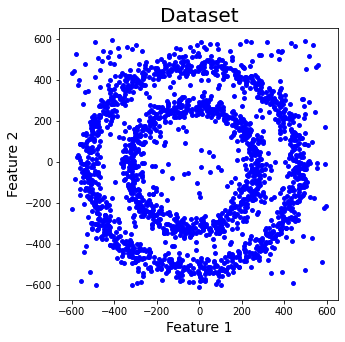

In [ ]:
## write your code here
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
#df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],s=15,color='blue')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

Number of clusters formed are: 5
Count: {0: 175, 1: 1079, 2: 736, 3: 7, 4: 4}
Number of outliers found:  175


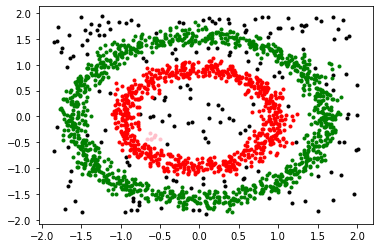

In [ ]:
## Write your code here
dataset = df.astype(float).values.tolist()
from itertools import islice
from itertools import cycle
import queue
from sklearn.preprocessing import StandardScaler

# normalize dataset
X = StandardScaler().fit_transform(dataset)
# normalize dataset
X = StandardScaler().fit_transform(dataset)
class CustomDBSCAN:
      def __init__(self):
        self.core = -1
        self.border = -2
     # Find all neighbour points at epsilon distance
      def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
          # Euclidian distance
          if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
            points.append(i)
        return points
      # Fit the data into the DBSCAN model
      def fit(self, data, Eps, MinPt):
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []
        # initilize list for core/border points
        core = []
        border = []
        # Find the neighbours of each individual point
        for i in range(len(data)):
          point_count.append(self.neighbour_points(data, i, Eps))
    # Find all the core points, border points and outliers
        for i in range(len(point_count)):
          if (len(point_count[i]) >= MinPt):
            point_label[i] = self.core
            core.append(i)
          else:
            border.append(i)
        for i in border:
          for j in point_count[i]:
            if j in core:
              point_label[i] = self.border
              break

      # Assign points to a cluster
        cluster = 1
      # Here we use a queue to find all the neighbourhood points of a core point and find the
    # indirectly reachable points.
    # We are essentially performing Breadth First search of all points which are within
    # epsilon distance from each other
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
              point_label[i] = cluster
              for x in point_count[i]:
                if(point_label[x] == self.core):
                  q.put(x)
                  point_label[x] = cluster
                elif(point_label[x] == self.border):
                  point_label[x] = cluster
              while not q.empty():
                neighbors = point_count[q.get()]
                for y in neighbors:
                    if (point_label[y] == self.core):
                        point_label[y] = cluster
                        q.put(y)
                    if (point_label[y] == self.border):
                        point_label[y] = cluster
              cluster += 1  # Move on to the next cluster
        print("Number of clusters formed are:", cluster)
        return point_label, cluster
      def visualize(self, data, cluster, numberOfClusters):
        N = len(data)
        # Define colors, ideally better to have around 7-10 colors defined
        colors = np.array(list(islice(cycle(['pink', 'green','red','brown','yellow','grey','blue','violet']), 3)))
        count ={}
        o =0
        for i in range(numberOfClusters):
          if (i == 0):
            # Plot all outliers point as black
            color = '#000000'
            count[i]=count.get(i,0)+1
          else:
            color = colors[i % len(colors)]

          x, y = [], []
          for j in range(N):
            if cluster[j] == i:
                count[i]=count.get(i,0)+1
                x.append(data[j, 0])
                y.append(data[j, 1])
          
          plt.scatter(x, y, c=color, alpha=1, marker='.')
        print("Count:",count)
        print("Number of outliers found: ",count[0])
      plt.show()
      

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.1, 4)
#print(point_labels, clusters)
custom_DBSCAN.visualize(X, point_labels, clusters)


[[ 1.65880731 -0.03780514]
 [ 1.6733592   0.13026358]
 [ 1.5876427  -0.02699884]
 ...
 [ 0.73422747  0.9234185 ]
 [-1.43580191 -0.45652708]
 [ 0.57576035 -0.2566729 ]]
this output is for eps = 0.5 and minpt = 4 


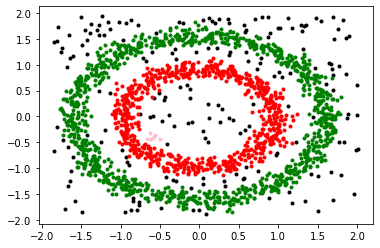

In [ ]:
#print(X)
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(dataset, 30, 4)
#print(point_labels, clusters)
print("this output is for eps = 0.5 and minpt = 4 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

Number of clusters formed are: 2
this output is for eps = 0.5 and minpt = 4 
Count: {0: 1, 1: 2000}
Number of outliers found:  1


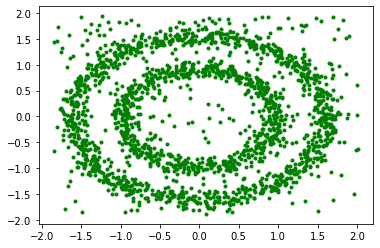

In [ ]:
## write your code here
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.5, 4)
#print(point_labels, clusters)
print("this output is for eps = 0.5 and minpt = 4 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

Number of clusters formed are: 8
this output is for eps = 0.15 and minpt = 3 
Count: {0: 45, 1: 1923, 2: 16, 3: 3, 4: 5, 5: 3, 6: 3, 7: 3}
Number of outliers found:  45


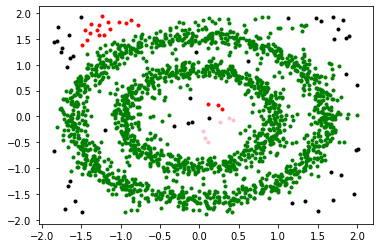

In [ ]:
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.15, 3)
#print(point_labels, clusters)
print("this output is for eps = 0.15 and minpt = 3 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

Number of clusters formed are: 3
this output is for eps = 0.25 and minpt = 3 
Count: {0: 4, 1: 1994, 2: 3}
Number of outliers found:  4


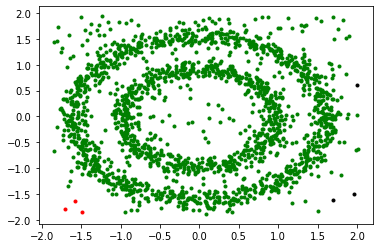

In [ ]:
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.25, 3)
#print(point_labels, clusters)
print("this output is for eps = 0.25 and minpt = 3 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

Number of clusters formed are: 140
this output is for eps = 0.05 and minpt = 4 
Count: {0: 758, 1: 17, 2: 8, 3: 18, 4: 4, 5: 8, 6: 21, 7: 9, 8: 8, 9: 5, 10: 3, 11: 11, 12: 11, 13: 33, 14: 13, 15: 4, 16: 10, 17: 4, 18: 7, 19: 5, 20: 10, 21: 5, 22: 4, 23: 11, 24: 10, 25: 6, 26: 6, 27: 9, 28: 4, 29: 7, 30: 15, 31: 7, 32: 13, 33: 4, 34: 4, 35: 4, 36: 6, 37: 4, 38: 5, 39: 16, 40: 5, 41: 5, 42: 12, 43: 4, 44: 17, 45: 5, 46: 21, 47: 6, 48: 5, 49: 4, 50: 6, 51: 6, 52: 5, 53: 18, 54: 4, 55: 9, 56: 11, 57: 4, 58: 16, 59: 6, 60: 4, 61: 6, 62: 4, 63: 13, 64: 4, 65: 8, 66: 6, 67: 11, 68: 9, 69: 7, 70: 6, 71: 9, 72: 9, 73: 7, 74: 11, 75: 7, 76: 8, 77: 5, 78: 11, 79: 6, 80: 5, 81: 11, 82: 5, 83: 5, 84: 6, 85: 6, 86: 3, 87: 15, 88: 7, 89: 17, 90: 4, 91: 4, 92: 19, 93: 13, 94: 8, 95: 4, 96: 37, 97: 15, 98: 15, 99: 4, 100: 9, 101: 4, 102: 10, 103: 4, 104: 5, 105: 6, 106: 12, 107: 5, 108: 37, 109: 4, 110: 26, 111: 4, 112: 8, 113: 19, 114: 4, 115: 4, 116: 8, 117: 8, 118: 32, 119: 4, 120: 3, 121: 7, 122: 7

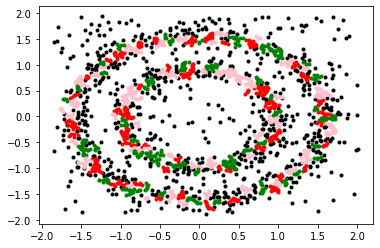

In [ ]:
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.05, 4)
#print(point_labels, clusters)
print("this output is for eps = 0.05 and minpt = 4 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

Number of clusters formed are: 6
this output is for eps = 0.15 and minpt = 5 
Count: {0: 72, 1: 1908, 2: 5, 3: 4, 4: 8, 5: 4}
Number of outliers found:  72


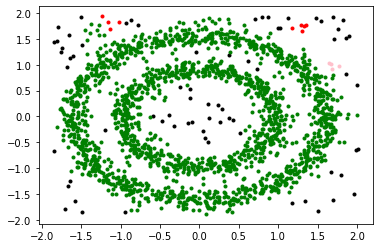

In [ ]:
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.15, 5)
#print(point_labels, clusters)
print("this output is for eps = 0.15 and minpt = 5 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

Number of clusters formed are: 7
this output is for eps = 0.12 and minpt = 4 
Count: {0: 112, 1: 1117, 2: 754, 3: 6, 4: 4, 5: 4, 6: 4}
Number of outliers found:  112


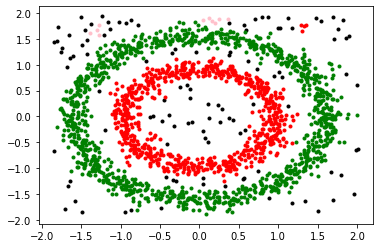

In [ ]:
custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.12, 4)
#print(point_labels, clusters)
print("this output is for eps = 0.12 and minpt = 4 ")
custom_DBSCAN.visualize(X, point_labels, clusters)

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

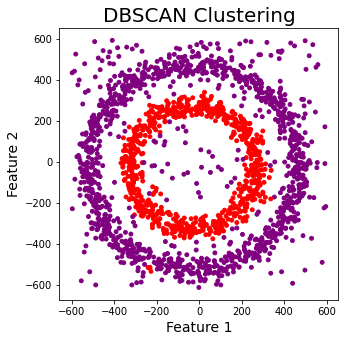

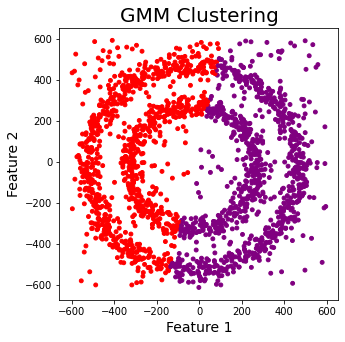

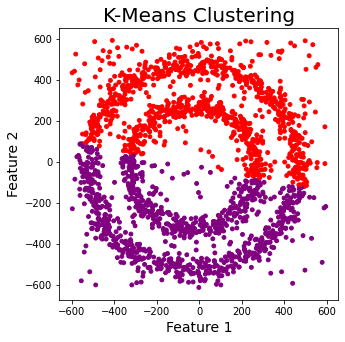

In [ ]:
from sklearn.cluster import DBSCAN
## write your code here
dbscan=DBSCAN(eps=30, min_samples=6)
dbscan.fit(df[[0,1]])
df['DBSCAN_labels']=dbscan.labels_ 
colors=['purple','red']
# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
gmm = GaussianMixture(n_components=2) 
gmm.fit(df[[0,1]])  
# predict the cluster for each data point 
y_cluster_gmm = gmm.predict(df[[0,1]]) 
df['GMM_labels']=y_cluster_gmm
# Plotting resulting clusters
colors=['purple','red']
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['GMM_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('GMM Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

########################################################################
from sklearn.cluster import KMeans
## write your code here
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(df[[0,1]])
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red']
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [ ]:
X = np.array([[1,1],
              [2,1],
              [5,4],
              [6,5],
              [6.5,6]])
X = X
print(X)

[[1.  1. ]
 [2.  1. ]
 [5.  4. ]
 [6.  5. ]
 [6.5 6. ]]


In [ ]:
def Euclidian_Dist(x,y):
  if str(type(s2[0]))!='<class \'list\'>':
    s2=[s2]
  if str(type(s1[0]))!='<class \'list\'>':
    s1=[s1]
    m = len(s1)
    n = len(s2)
    dist = []
    if n>=m:
      for i in range(n):
        for j in range(m):
          if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
            dist.append(interclusterdist(s2[i],s1[j]))
          else:
            dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
    else:
      for i in range(m):
        for j in range(n):
          if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
            dist.append(interclusterdist(s1[i],s2[j]))
          else:
            dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)

def interclusterdist(cl,sample):
  if sample[0]!='<class \'list\'>':
    sample = [sample]
  dist   = []
  for i in range(len(cl)):
    for j in range(len(sample)):
      dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
  return min(dist)


def Dist_mat(X):
  Dist_mat = np.zeros((len(X),len(X)))
  for i in range(Dist_mat.shape[0]):
    for j in range(Dist_mat.shape[0]):
      if i!=j:
        Dist_mat[i,j] = float(Dist_cal(X[i],X[j]))
      else:
        Dist_mat[i,j] = 10**4
  return Dist_mat


def Dist_cal(X1,X2):
  Dist = []
  for i in range(len(X1)):
    for j in range(len(X2)):
      try:
        Dist.append(np.linalg.norm(np.array(X1[i])-np.array(X2[j])))
      except:
        Dist.append(Euclidian_Dist(X1[i],X2[j]))
  return min(Dist)


def combine(X):
  newX = Dist_mat(X)
  return newX


Sample size before clustering    :-  5
Progression(Current Sample)      :- [[[0, [1]]], [2], [3], [4]]
Cluster attained                 :- [[0, [1]]]
Sample size after clustering     :- 4


Sample size before clustering    :-  4
Progression(Current Sample)      :- [[[[0, [1]], [2]]], [3], [4]]
Cluster attained                 :- [[[0, [1]], [2]]]
Sample size after clustering     :- 3


Sample size before clustering    :-  3
Progression(Current Sample)      :- [[[[[0, [1]], [2]], [3]]], [4]]
Cluster attained                 :- [[[[0, [1]], [2]], [3]]]
Sample size after clustering     :- 2


Sample size before clustering    :-  2
Progression(Current Sample)      :- [[[[[[0, [1]], [2]], [3]], [4]]]]
Cluster attained                 :- [[[[[0, [1]], [2]], [3]], [4]]]
Sample size after clustering     :- 1




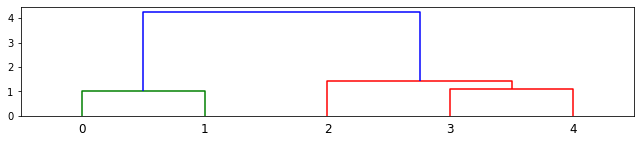

In [ ]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])

## write your code here
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = combine(samples)
while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')


from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(11, 2))
dn = dendrogram(Z)

## validate from inbuilt Dendogram
import plotly.figure_factory as ff
X=X.transpose()
lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [ ]:
!pip install idx2numpy

(28, 28)


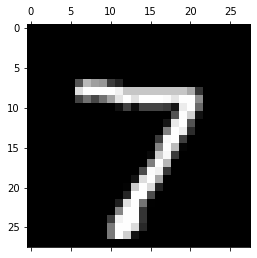

(28, 28)


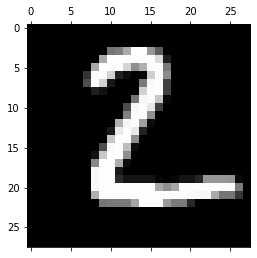

(28, 28)


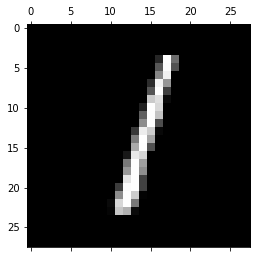

In [ ]:
import idx2numpy
from keras.utils import np_utils
import matplotlib.pyplot as plt

img_path = r"/content/t10k-images-idx3-ubyte"## write your code here
label_path =r"/content/t10k-labels-idx1-ubyte" ## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

## write your code here
for i in range(3):
  print(Images[i].shape)
  plt.matshow(Images[i],cmap=plt.get_cmap('gray'))
  plt.show()

In [ ]:
 X = Images.reshape(len(Images),-1)
 print(X.shape)
 Y = labels
 print(Y.shape)
 # normalize the data to 0 - 1

X = X.astype(float) / 255.
X[0].shape

(10000, 784)
(10000,)


(784,)

Use the K-means clustering algorithm from the last lab to form the clusters 

In [ ]:
## write your code here

import scipy.spatial.distance as metric
#def euclidean_dist(A, B):
 #   return metric.euclidean(A, B)
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data  
        self.centeriod_init = centeriod_init
        
    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        
        while changed and num_iter<100:
            changed = False 
            # for each row in the dataset
            for i in range(m):
                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1 
                #calculate distance 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j 
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig
n_digits = len(np.unique(Y))
kmeans = K_Means(k=n_digits,data = X,centeriod_init='firstk')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(X)
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 


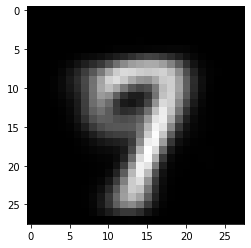

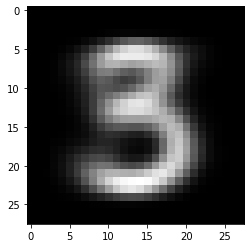

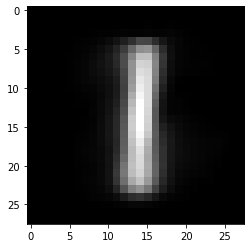

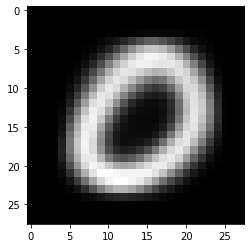

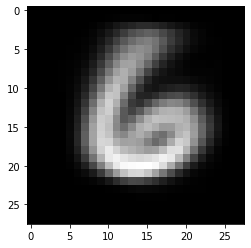

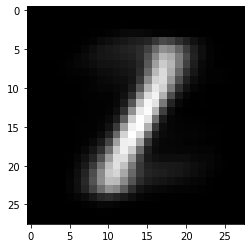

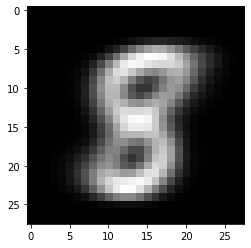

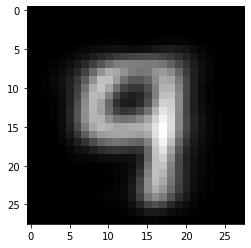

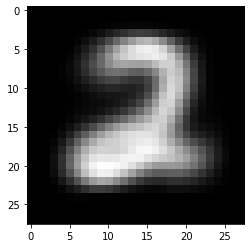

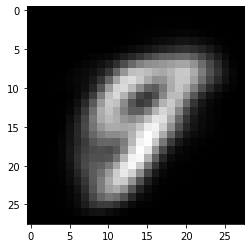

In [ ]:
cluster_My_labels = index
cluster_My_labels.shape
centroids_resh = np.reshape(centroids,(centroids.shape[0],28,28))
centroids_resh.shape
for i in range(10):
  plt.imshow(centroids_resh[i],cmap=plt.get_cmap('gray'))
  plt.show()

Use the GMM clustering algorithm from the last lab to form the clusters

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
 
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
X = test_X.reshape(len(test_X),-1)
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

np.random.seed(42)
gmm = GMM(k=10, max_iter=10)
gmm.fit(X)

LinAlgError: ignored

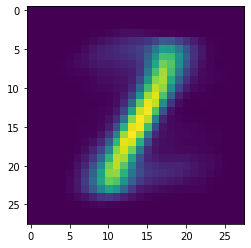

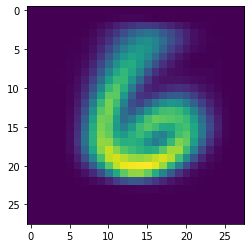

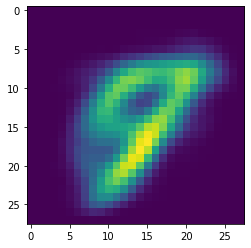

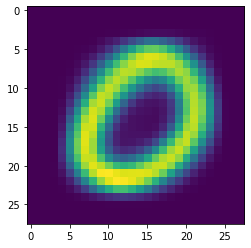

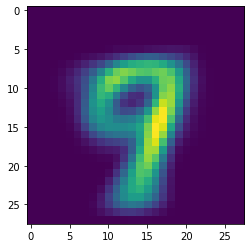

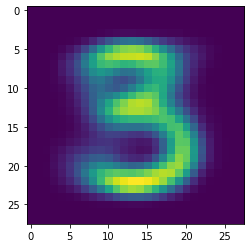

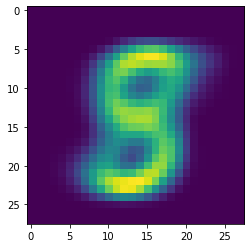

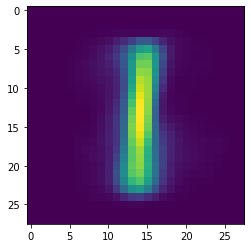

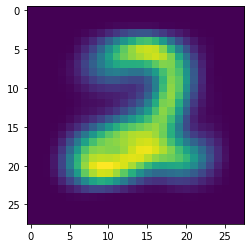

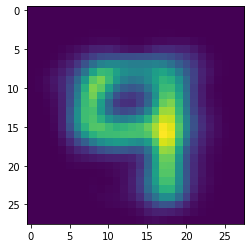

In [ ]:
from sklearn import mixture
g = mixture.GaussianMixture(n_components=10)
g.fit(X)
for cluster_center in g.means_:
  plt.imshow(cluster_center.reshape(28,28))
  plt.show()

In [ ]:
import numpy as np
import gzip
import struct
from array import array
from os.path  import join


#from mnist_dataset import get_mnist
import pdb
import numpy as np
import math
import warnings

warnings.filterwarnings("ignore")
np.random.seed(17)


def logdet(X):
    lamb = np.linalg.eig(X)[0]
    if np.any(lamb <= 0.0):
        return np.log(2.2204e-16)
    else:
        return np.sum(np.log(lamb), axis=0)


class gmm_classifier:
    def __init__(self):
        self.n_classes = 0
        self.pc = []
        self.mu = []
        self.sigma = []
        self.pkGc = []

    def compute_zk(self, X, ic, k):
        mu = self.mu[ic][:, k]
        sigma = self.sigma[ic][k]
        D = X.shape[1]
        cons = np.log(self.pkGc[ic][k])
        cons = cons - 0.5 * D * np.log(2 * np.pi)
        cons = cons - 0.5 * logdet(sigma)
        cons = cons - 0.5 * mu.T.dot(np.linalg.pinv(sigma).dot(mu))
        lin = X.dot(mu.T.dot(np.linalg.pinv(sigma)).T)
        qua = -0.5 * np.sum(np.multiply(X.dot(np.linalg.pinv(sigma)), X), axis=1)
        zk = qua + lin + cons
        return zk

    def train(self, x, y, xt, yt, K, alpha=1.0):

        self.n_classes = len(set(y))
        self.sigma = [[] for _ in range(self.n_classes)]
        self.K = K
        # Initialization of parameters for the mixture of gaussians
        # Estimation of class priors as histogram counts
        pc = np.bincount(y) / x.shape[0]
        self.pc = pc
        for c in range(self.n_classes):
            # Initialization of component priors p(k|c) as uniform distro
            self.pkGc.append([1 / K for _ in range(K)])
            mask = np.where(y == c)[0]
            xtmp = x[mask]
            # Initialization of K component means mu_kc as K random samples from class c
            choices = np.random.choice(mask, K)
            muc = x[choices].T
            self.mu.append(muc)
            #  Initialization of K component covariance sigma_kc
            #  as K class covariance matrix divided by the number of components K
            sigma = np.cov(xtmp, rowvar=False, bias=True) / K
            self.sigma[c] = [sigma for _ in range(K)]
        epsilon = 1e-4
        L = float("-inf")
        it = 0
        oL = L
        print(" It          oL           L trerr teerr\n")
        print("--- ----------- ----------- ----- -----\n")
        while not ((L - oL) / abs(oL) < epsilon):
            oL = L
            L = 0
            for c in range(self.n_classes):
                # E step
                mask = np.where(y == c)[0]
                xtmp = x[mask]
                Nc = len(xtmp)
                zk = []
                for k in range(K):
                    zk.append(self.compute_zk(xtmp, c, k))
                zk = np.array(zk).T
                # Robust computation of znk and log-likehood
                maxzk = zk.max(axis=1)
                zk = np.exp(zk - maxzk.reshape(-1, 1))
                sumzk = np.sum(zk, 1)
                zk = np.divide(zk, sumzk.reshape(-1, 1))
                L = L + Nc * np.log(pc[c]) + np.sum(maxzk + np.log(sumzk), 0)
                # M step: parameter update
                # Weight of each component
                sumzk = np.sum(zk, 0)
                self.pkGc[c] = sumzk / Nc
                self.mu[c] = np.divide(xtmp.T.dot(zk), sumzk)

                for k in range(K):
                    covar = (
                        (xtmp - self.mu[c][:, k].T).T.dot(np.multiply(xtmp - self.mu[c][:, k].T, zk[:, k].reshape(-1, 1)))
                    ) / sumzk[k]
                    # Smoothing
                    self.sigma[c][k] = alpha * covar + (1 - alpha) * np.eye(x.shape[1])
            # Likelihood divided by the number of training samples
            L = L / len(x)
            # Compute g for training and test sets
            gtr = []
            gte = []
            for c in range(self.n_classes):
                # Training set
                zk = []
                for k in range(K):
                    zk.append(self.compute_zk(x, c, k))
                zk = np.array(zk).T
                # Robust computation of znk
                maxzk = zk.max(axis=1)
                zk = np.exp(zk - maxzk.reshape(-1, 1))
                sumzk = np.sum(zk, 1)
                tmp_gtr = np.log(pc[c]) + maxzk + np.log(sumzk)
                gtr.append(tmp_gtr)
                # Test set
                zk = []
                for k in range(K):
                    zk.append(self.compute_zk(xt, c, k))
                zk = np.array(zk).T
                # Robust computation of znk
                maxzk = zk.max(axis=1)
                zk = np.exp(zk - maxzk.reshape(-1, 1))
                sumzk = np.sum(zk, 1)
                tmp_gte = np.log(pc[c]) + maxzk + np.log(sumzk)
                gte.append(tmp_gte)
            gtr = np.array(gtr).T
            gte = np.array(gte).T
            # Classification of training and test sets and error estimation
            ## Training
            yhat = np.argmax(gtr, axis=1)
            trerr = np.mean(y != yhat) * 100
            ## Test
            yhat = np.argmax(gte, axis=1)
            teerr = np.mean(yt != yhat) * 100
            it += 1
            print("{} {:11.5f}  {:11.5f}  {:5.2f} {:5.2f}".format(it, oL, L, trerr, teerr))

    def predict(self, x):
        gtr = []
        for c in range(self.n_classes):
            zk = []
            for k in range(self.K):
                zk.append(self.compute_zk(x, c, k))
            zk = np.array(zk).T
            # Robust computation of znk
            maxzk = zk.max(axis=1)
            zk = np.exp(zk - maxzk.reshape(-1, 1))
            sumzk = np.sum(zk, 1)
            tmp_gtr = np.log(self.pc[c]) + maxzk + np.log(sumzk)
            gtr.append(tmp_gtr)
        gtr = np.array(gtr).T
        yhat = np.argmax(gtr, axis=1)
        return yhat

In [ ]:
#from gmm_classifier import gmm_classifier
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = (train_X,train_y),(test_X,test_y)
x_train, y_train, x_validate, y_validate = train_X.reshape(len(train_X),-1),train_y,test_X.reshape(len(test_X),-1),test_y
gauss = gmm_classifier()
#Here we pass validate data for early stopping
gauss.train(x_train,y_train,x_validate,y_validate,K=2,alpha=1.0) #K number of mixtures and alpha value for smoothing
yhat = gauss.predict(test_X.reshape(len(test_X),-1))
yhat!=y_test ## Error rate

 It          oL           L trerr teerr

--- ----------- ----------- ----- -----

1        -inf  -1529.65287  83.96 83.66
2 -1529.65287  821023403036141397254151014050693120.00000  90.25 90.26
3 821023403036141397254151014050693120.00000   -926.24400  90.09 89.92


array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
print(np.unique(y_test))
print(np.unique(yhat))

[0 1 2 3 4 5 6 7 8 9]
[1 9]
